# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
## 超參數設定
learning_rate = [1e-1,1e-2,1e-3]
epochs = 50
batch_size = 256
OPTIMIZER = ['SGD','RMSprop','AdaGrad','Adam'] 
MOMENTUM = 0.95

In [14]:
results = {}
for lr1 in learning_rate:
    for opt in OPTIMIZER:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with learning_rate = {} + optimizer = {}".format(lr1, str(opt)))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        if opt == 'SGD':
            optimizer = keras.optimizers.SGD(lr=lr1, nesterov=True, momentum=MOMENTUM)
        elif opt == 'RMSprop':
            optimizer = keras.optimizers.RMSprop(lr=lr1)
        elif opt == 'AdaGrad':
            optimizer = keras.optimizers.Adagrad(lr=lr1)
        elif opt == 'Adam':
            optimizer = keras.optimizers.Adam(lr=lr1)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        model.fit(x_train, y_train, 
                  epochs=epochs, 
                  batch_size=batch_size, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-lr={},optimizer={}".format(lr1, str(opt))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with learning_rate = 0.1 + optimizer = SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [====

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 150us/step - loss: 14.4453 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 7s 149us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 155us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 166us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 8s 155us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 7s 150us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 7s 149us/step - loss: 14.5063 - acc: 0.1000 - val_lo

50000/50000 [==============================] - 8s 156us/step - loss: 14.4452 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 7s 144us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 157us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 7s 144us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 146us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 7s 143us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 7s 140us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [=======

50000/50000 [==============================] - 9s 180us/step - loss: 14.4426 - acc: 0.1002 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 9s 174us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 158us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 161us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 8s 159us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 162us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 163us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [=======

50000/50000 [==============================] - 7s 130us/step - loss: 1.8221 - acc: 0.3499 - val_loss: 1.6824 - val_acc: 0.3947
Epoch 2/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.6008 - acc: 0.4309 - val_loss: 1.5498 - val_acc: 0.4490
Epoch 3/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.5074 - acc: 0.4646 - val_loss: 1.5091 - val_acc: 0.4685
Epoch 4/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.4470 - acc: 0.4875 - val_loss: 1.5350 - val_acc: 0.4643
Epoch 5/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.3964 - acc: 0.5024 - val_loss: 1.4126 - val_acc: 0.4967
Epoch 6/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.3607 - acc: 0.5185 - val_loss: 1.4338 - val_acc: 0.4903
Epoch 7/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.3220 - acc: 0.5297 - val_loss: 1.3927 - val_acc: 0.4987
Epoch 8/50
50000/50000 [=====================

Epoch 2/50
50000/50000 [==============================] - 8s 151us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 159us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 7s 146us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 150us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 7s 149us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 7s 144us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 7s 138us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/500

50000/50000 [==============================] - 7s 140us/step - loss: 14.5012 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 7s 150us/step - loss: 14.5062 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 7s 130us/step - loss: 14.5062 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 135us/step - loss: 14.5062 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 152us/step - loss: 14.5061 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 7s 150us/step - loss: 14.4673 - acc: 0.1012 - val_loss: 14.5059 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 7s 136us/step - loss: 14.4970 - acc: 0.1004 - val_loss: 14.5052 - val_acc: 0.1000
Epoch 9/50
50000/50000 [=======

50000/50000 [==============================] - 8s 159us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 160us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 9s 182us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 9s 180us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 9s 174us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 164us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 8s 162us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [=======

50000/50000 [==============================] - 8s 156us/step - loss: 2.0386 - acc: 0.2685 - val_loss: 1.8723 - val_acc: 0.3389A: 3s - loss: 2.1151 -  - ETA: 2s -
Epoch 2/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.8083 - acc: 0.3643 - val_loss: 1.7561 - val_acc: 0.3845
Epoch 3/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.7252 - acc: 0.3930 - val_loss: 1.7098 - val_acc: 0.3979
Epoch 4/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.6683 - acc: 0.4141 - val_loss: 1.6513 - val_acc: 0.4195
Epoch 5/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.6195 - acc: 0.4303 - val_loss: 1.6022 - val_acc: 0.4383
Epoch 6/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.5788 - acc: 0.4467 - val_loss: 1.5805 - val_acc: 0.4395
Epoch 7/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.5444 - acc: 0.4577 - val_loss: 1.5455 - val_acc: 0.4495
Epoch 8/50

Epoch 2/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.8931 - acc: 0.3165 - val_loss: 1.7912 - val_acc: 0.3624
Epoch 3/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.7771 - acc: 0.3634 - val_loss: 1.7496 - val_acc: 0.3812
Epoch 4/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.7057 - acc: 0.3884 - val_loss: 1.7318 - val_acc: 0.3599
Epoch 5/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.6525 - acc: 0.4107 - val_loss: 1.8296 - val_acc: 0.3614
Epoch 6/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.6030 - acc: 0.4299 - val_loss: 1.9200 - val_acc: 0.3551
Epoch 7/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.5674 - acc: 0.4417 - val_loss: 1.6549 - val_acc: 0.4032
Epoch 8/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.5368 - acc: 0.4534 - val_loss: 1.6205 - val_acc: 0.4220
Epoch 9/50
50000/50000 [==========

Epoch 3/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.7275 - acc: 0.3907 - val_loss: 1.7206 - val_acc: 0.3835
Epoch 4/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.6806 - acc: 0.4095 - val_loss: 1.6765 - val_acc: 0.4111
Epoch 5/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.6472 - acc: 0.4217 - val_loss: 1.6740 - val_acc: 0.4035
Epoch 6/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.6185 - acc: 0.4326 - val_loss: 1.6305 - val_acc: 0.4289
Epoch 7/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.5962 - acc: 0.4428 - val_loss: 1.5989 - val_acc: 0.4365
Epoch 8/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.5764 - acc: 0.4482 - val_loss: 1.5994 - val_acc: 0.4348
Epoch 9/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.5602 - acc: 0.4553 - val_loss: 1.5987 - val_acc: 0.4394
Epoch 10/50
50000/50000 [=========

Epoch 4/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.5504 - acc: 0.4460 - val_loss: 1.5200 - val_acc: 0.4575
Epoch 5/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.5004 - acc: 0.4669 - val_loss: 1.4965 - val_acc: 0.4598
Epoch 6/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.4615 - acc: 0.4784 - val_loss: 1.5003 - val_acc: 0.4754
Epoch 7/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.4264 - acc: 0.4905 - val_loss: 1.4816 - val_acc: 0.4710
Epoch 8/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.4024 - acc: 0.5016 - val_loss: 1.4357 - val_acc: 0.4891
Epoch 9/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.3695 - acc: 0.5129 - val_loss: 1.4226 - val_acc: 0.4970
Epoch 10/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.3417 - acc: 0.5199 - val_loss: 1.4623 - val_acc: 0.4794
Epoch 11/50
50000/50000 [========

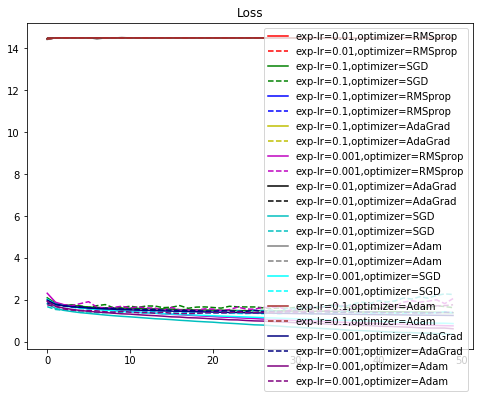

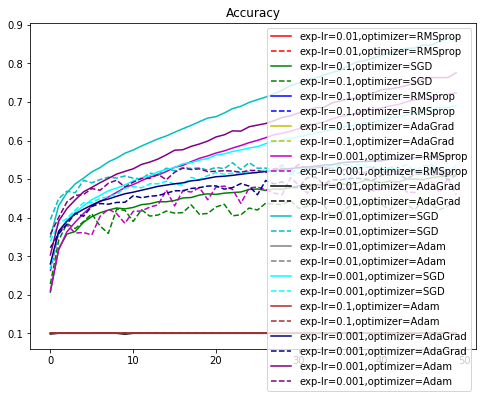

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k","c","gray","aqua","brown","navy","purple"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()